In [23]:
#importing libary
import pandas as pd
import matplotlib.pyplot as plt



In [24]:
# Load the dataset
df = pd.read_excel(r"C:\Users\user\Downloads\online+retail\Online Retail.xlsx")

# Display the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data cleaning

In [25]:

# Check for missing values
missing_values = df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicate rows
duplicates = df.duplicated().sum()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert the InvoiceDate column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



# Check the cleaned data
df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


#### Exploratory Data Analysis (EDA)Exploratory Data Analysis (EDA)

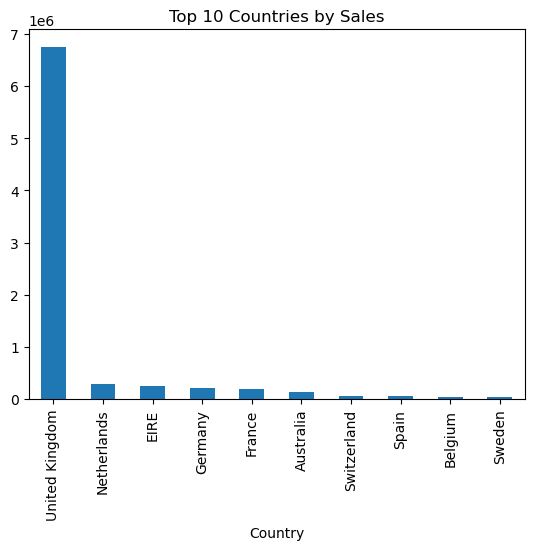

In [27]:
# Add a 'Revenue' column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by 'Country' and sum the 'Revenue'
sales_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Get the top 10 countries by sales
top_countries = sales_by_country.head(10)

# Visualize the top 10 countries by sales
top_countries.plot(kind='bar', title='Top 10 Countries by Sales')

#Save the plot for top 10 countries by sales
plt.savefig(r"C:\Users\user\Downloads\online+retail\Top_10_Countries_by_Sales.png")



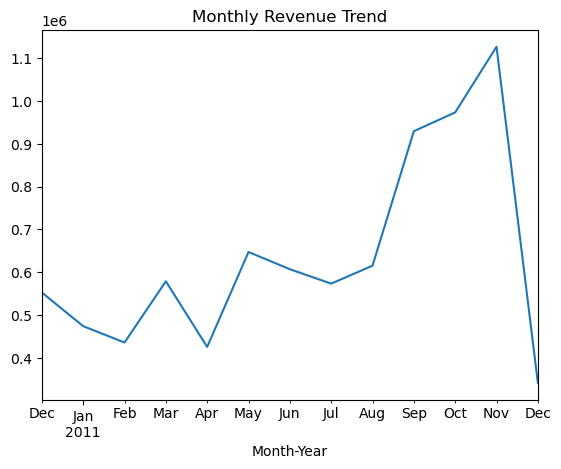

In [28]:
# Add a new column for Month-Year
df['Month-Year'] = df['InvoiceDate'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = df.groupby('Month-Year')['Revenue'].sum()

# Plot the monthly revenue trend
monthly_revenue.plot(title='Monthly Revenue Trend')

# Save the plot for monthly revenue trend

plt.savefig(r"C:\Users\user\Downloads\online+retail\Monthly_Revenue_Trend.png")



<Axes: title={'center': 'Top 10 Products by Sales'}, xlabel='Description'>

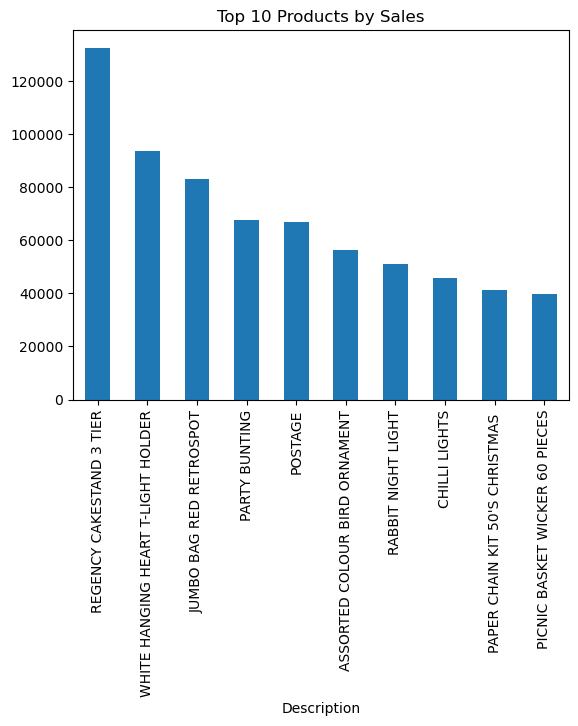

In [29]:
# Calculate the revenue for each product
df['Revenue'] = df['Quantity'] * df['UnitPrice']
product_sales = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Top 10 products by sales
top_products = product_sales.head(10)

# Visualize the top 10 products by sales
top_products.plot(kind='bar', title='Top 10 Products by Sales')

# Save the plot for top 10 products by sales
top_products.plot(kind='bar', title='Top 10 Products by Sales')



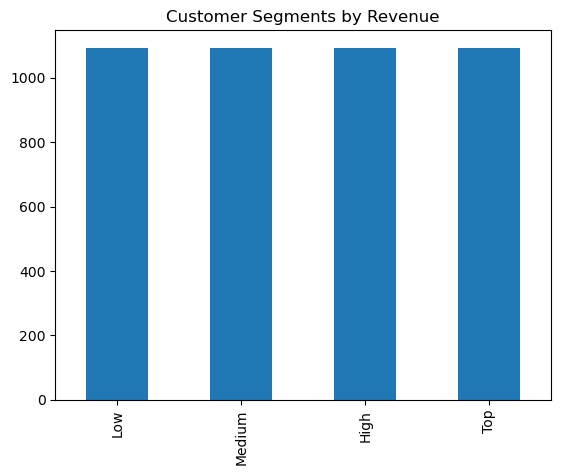

In [30]:
# Customer segmentation based on revenue
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)

# Segment customers into quartiles
customer_segments = pd.qcut(customer_revenue, 4, labels=['Low', 'Medium', 'High', 'Top'])

# Analyze the segments
segment_analysis = customer_segments.value_counts().sort_index()
segment_analysis.plot(kind='bar', title='Customer Segments by Revenue')

# Save the plot for customer segments by revenue
plt.savefig(r"C:\Users\user\Downloads\online+retail\Customer_Segments_by_Revenue.png")



In [32]:
# Save the cleaned data to an Excel file
df.to_csv(r"C:\Users\user\Downloads\online+retail\Cleaned_Online_Retail.csv", index=False)